In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ettevotja_rekv_lihtandmed = pd.read_csv("data/ettevotja_rekvisiidid__lihtandmed.csv", delimiter=";", encoding="utf-8")
ettevotja_rekv_lihtandmed.head()

,nimi,ariregistri_kood,ettevotja_oiguslik_vorm,ettevotja_oigusliku_vormi_alaliik,kmkr_nr,ettevotja_staatus,ettevotja_staatus_tekstina,ettevotja_esmakande_kpv,ettevotja_aadress,asukoht_ettevotja_aadressis,asukoha_ehak_kood,asukoha_ehak_tekstina,indeks_ettevotja_aadressis,ads_adr_id,ads_ads_oid,ads_normaliseeritud_taisaadress,teabesysteemi_link
0,000 Holdings OÜ,16372442,Osaühing,NaN,NaN,R,Registrisse kantud,23.11.2021,NaN,"313A/133 GOULBURN STREET, Surry Hills, NSW",NaN,NaN,2010,NaN,NaN,NaN,https://ariregister.rik.ee/est/company/16372442
1,001 group OÜ,12754230,Osaühing,NaN,NaN,R,Registrisse kantud,17.11.2014,NaN,Õismäe tee 78-9,176.0,"Haabersti linnaosa, Tallinn, Harju maakond",13513,2182337.0,NaN,"Harju maakond, Tallinn, Haabersti linnaosa, Õi...",https://ariregister.rik.ee/est/company/12754230
2,001 Kinnisvara OÜ,12652512,Osaühing,NaN,EE101721589,R,Registrisse kantud,25.04.2014,NaN,Õismäe tee 78-9,176.0,"Haabersti linnaosa, Tallinn, Harju maakond",13513,2182337.0,NaN,"Harju maakond, Tallinn, Haabersti linnaosa, Õi...",https://ariregister.rik.ee/est/company/12652512
3,007 Agent & Partners OÜ,16752073,Osaühing,NaN,NaN,R,Registrisse kantud,05.06.2023,NaN,Regati pst 12,596.0,"Pirita linnaosa, Tallinn, Harju maakond",11911,2363082.0,NaN,"Harju maakond, Tallinn, Pirita linnaosa, Regat...",https://ariregister.rik.ee/est/company/16752073
4,007 Autohaus osaühing,11694365,Osaühing,NaN,EE101335276,R,Registrisse kantud,30.07.2009,NaN,Turu tn 34,8151.0,"Tartu linn, Tartu linn, Tartu maakond",51004,3047590.0,NaN,"Tartu maakond, Tartu linn, Tartu linn, Turu tn 34",https://ariregister.rik.ee/est/company/11694365


In [3]:
ettevotja_rekv_lihtandmed.rename(columns={"ariregistri_kood": "registrikood"}, inplace=True)
ettevotja_rekv_lihtandmed = ettevotja_rekv_lihtandmed[["nimi", "registrikood", "ettevotja_oiguslik_vorm", "asukoha_ehak_tekstina"]]
print(ettevotja_rekv_lihtandmed.shape)
ettevotja_rekv_lihtandmed.dropna(inplace=True)
print(ettevotja_rekv_lihtandmed.shape)

(358857, 4)
(330041, 4)


In [4]:
ettevotja_rekv_yldandmed = pd.read_json("data/ettevotja_rekvisiidid__yldandmed.json", encoding="utf-8")

In [5]:
flattened_data = pd.json_normalize(ettevotja_rekv_yldandmed.to_dict('records'), sep='_')
flattened_data.head()

,ariregistri_kood,nimi,yldandmed_ettevotteregistri_nr,yldandmed_esmaregistreerimise_kpv,yldandmed_kustutamise_kpv,yldandmed_staatus,yldandmed_staatus_tekstina,yldandmed_piirkond,yldandmed_piirkond_tekstina,yldandmed_piirkond_tekstina_pikk,...,yldandmed_valismaa_ariyhing_register,yldandmed_valismaa_ariyhing_registreerimisnumber,yldandmed_valismaa_ariyhing_majandusaasta_aruande_avalikustamise_kohustus,yldandmed_tegutsemise_tahtajad,yldandmed_nimivaartuseta_aktsiad,yldandmed_ky_kinnistu_aadressid,yldandmed_taiendavad_nimed,yldandmed_esmanimetamise_ajad,yldandmed_valislepingud,yldandmed_kompromissi_tahtajad
0,16372442,000 Holdings OÜ,NaN,23.11.2021,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12754230,001 group OÜ,NaN,17.11.2014,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12652512,001 Kinnisvara OÜ,NaN,25.04.2014,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16752073,007 Agent & Partners OÜ,NaN,05.06.2023,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11694365,007 Autohaus osaühing,NaN,30.07.2009,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_cleaned = flattened_data[["ariregistri_kood","yldandmed_staatus_tekstina", "yldandmed_on_raamatupidamiskohustuslane", "yldandmed_esitab_kasusaajad"]]

In [9]:
data_cleaned.rename(columns={"ariregistri_kood": "registrikood"}, inplace=True)
data_cleaned.head()

C:\Users\kevin\AppData\Local\Temp\ipykernel_16092\929435045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.rename(columns={"ariregistri_kood": "registrikood"}, inplace=True)


,registrikood,yldandmed_staatus_tekstina,yldandmed_on_raamatupidamiskohustuslane,yldandmed_esitab_kasusaajad
0,16372442,Registrisse kantud,False,True
1,12754230,Registrisse kantud,False,True
2,12652512,Registrisse kantud,False,True
3,16752073,Registrisse kantud,False,True
4,11694365,Registrisse kantud,False,True


In [10]:
aru_yldandmed = pd.read_csv("data/1.aruannete_yldandmed_kuni_30112023.csv", delimiter=";", encoding="utf-8")
aru_elemendid_2022 = pd.read_csv("data/4.2022_aruannete_elemendid_kuni_30112023.csv", delimiter=";", encoding="utf-8")
aru_elemendid_2021 = pd.read_csv("data/4.2021_aruannete_elemendid_kuni_30112023.csv", delimiter=";", encoding="utf-8")
aru_elemendid_2020 = pd.read_csv("data/4.2020_aruannete_elemendid_kuni_30112023.csv", delimiter=";", encoding="utf-8")
aru_yldandmed.head()

C:\Users\kevin\AppData\Local\Temp\ipykernel_16092\2099308116.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  aru_yldandmed = pd.read_csv("data/1.aruannete_yldandmed_kuni_30112023.csv", delimiter=";", encoding="utf-8")


,report_id,täidetud_aruuanne_report_id,registrikood,aruandeaast,kas konsolideeritud?,period_start,period_end,esitatud_kpv,kas auditeeritud?,auditi töövõtu liik,audiitori otsuse tüüp,modifikatsioon asjaolu rõhutamine,modifikatsioon muu asjaolu,modifikatsioon tegevuse jatkuvus
0,1262635,NaN,14015206,2021,Ei,1.01.2021,30.04.2021,08.02.2022,Ei,NaN,NaN,NaN,NaN,NaN
1,1628202,NaN,14766421,2020,Ei,23.07.2019,31.12.2020,29.04.2021,Ei,NaN,NaN,NaN,NaN,NaN
2,1639703,NaN,14777732,2020,Ei,8.08.2019,30.12.2020,22.06.2021,Ei,NaN,NaN,NaN,NaN,NaN
3,1641079,NaN,14309698,2020,Ei,1.01.2020,31.12.2020,14.10.2021,Ei,NaN,NaN,NaN,NaN,NaN
4,1642568,NaN,14826034,2020,Ei,14.10.2019,31.12.2020,04.06.2021,Ei,NaN,NaN,NaN,NaN,NaN


In [11]:
nan_values1 = aru_elemendid_2022.isna().sum()
nan_values2 = aru_elemendid_2021.isna().sum()
nan_values3 = aru_elemendid_2020.isna().sum()
print(aru_elemendid_2022.shape)
print(nan_values1)
print()
print(aru_elemendid_2021.shape)
print(nan_values2)
print()
print(aru_elemendid_2020.shape)
print(nan_values3)
print()

(2696784, 5)
report_id               0
tabel                   0
elemendi_label          0
elemendi_nimetus    17316
vaartus              8160
dtype: int64

(2727039, 5)
report_id               0
tabel                   0
elemendi_label          0
elemendi_nimetus    18702
vaartus              8857
dtype: int64

(2682575, 5)
report_id               0
tabel                   0
elemendi_label          0
elemendi_nimetus    19532
vaartus              9272
dtype: int64


In [12]:
aru_yldandmed = aru_yldandmed[["report_id", "registrikood"]]

In [13]:
aru_elemendid_2022["year"] = 2022
aru_elemendid_2021["year"] = 2021
aru_elemendid_2020["year"] = 2020

merged_aru_2022 = pd.merge(aru_yldandmed, aru_elemendid_2022, on="report_id", how="right")
merged_aru_2021 = pd.merge(aru_yldandmed, aru_elemendid_2021, on="report_id", how="right")
merged_aru_2020 = pd.merge(aru_yldandmed, aru_elemendid_2020, on="report_id", how="right")
merged_aru_2020.head()

,report_id,registrikood,tabel,elemendi_label,elemendi_nimetus,vaartus,year
0,1659827,12235636.0,Likvideerimise algbilanss,Osakapital nimiväärtuses,IssuedCapital,2500.0,2020
1,1668681,11288820.0,Bilanss,Raha,CashAndCashEquivalents,0.0,2020
2,1668681,11288820.0,Bilanss,Varad,Assets,2556.0,2020
3,1668681,11288820.0,Kasumiaruanne skeem 1,Aruandeaasta kasum (kahjum),TotalAnnualPeriodProfitLoss,0.0,2020
4,1668681,11288820.0,Kasumiaruanne skeem 1,Müügitulu,Revenue,0.0,2020


In [14]:
merged_aru_2021.head()

,report_id,registrikood,tabel,elemendi_label,elemendi_nimetus,vaartus,year
0,1882838,16118465.0,Kasumiaruanne skeem 1,Müügitulu,Revenue,212.0,2021
1,1868837,11702432.0,Kasumiaruanne skeem 1,Ärikasum (kahjum),TotalProfitLoss,69011.0,2021
2,1868837,11702432.0,Lisa: Tööjõukulud,Tööjõukulud,LaborExpense,13410.0,2021
3,1868837,11702432.0,Lisa: Tööjõukulud,Töötajate keskmine arv taandatuna täistööajale,AverageNumberOfEmployeesInFullTimeEquivalentUnits,1.0,2021
4,1818857,16050885.0,"Bilanss, detailne",Käibevarad,CurrentAssets,17688.0,2021


In [15]:
merged_aru_2022.head()

,report_id,registrikood,tabel,elemendi_label,elemendi_nimetus,vaartus,year
0,2168222,14314943.0,Likvideerimise algbilanss,Käibevarad,CurrentAssets,0.0,2022
1,2137566,14451404.0,Bilanss,Käibevarad,CurrentAssets,104295.0,2022
2,2137566,14451404.0,Bilanss,Lühiajalised kohustised,CurrentLiabilities,101594.0,2022
3,2137566,14451404.0,Bilanss,Omakapital,Equity,65638.0,2022
4,2137566,14451404.0,Bilanss,Osakapital nimiväärtuses,IssuedCapital,2500.0,2022


In [16]:
merged_2022 = pd.merge(merged_aru_2022, ettevotja_rekv_lihtandmed, on="registrikood", how="left")
merged_2021 = pd.merge(merged_aru_2021, ettevotja_rekv_lihtandmed, on="registrikood", how="left")
merged_2020 = pd.merge(merged_aru_2020, ettevotja_rekv_lihtandmed, on="registrikood", how="left")

In [17]:
merged_2022.head(20)

,report_id,registrikood,tabel,elemendi_label,elemendi_nimetus,vaartus,year,nimi,ettevotja_oiguslik_vorm,asukoha_ehak_tekstina
0,2168222,14314943.0,Likvideerimise algbilanss,Käibevarad,CurrentAssets,0.0,2022,Donna ja Bella OÜ,Osaühing,"Kesklinna linnaosa, Tallinn, Harju maakond"
1,2137566,14451404.0,Bilanss,Käibevarad,CurrentAssets,104295.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond"
2,2137566,14451404.0,Bilanss,Lühiajalised kohustised,CurrentLiabilities,101594.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond"
3,2137566,14451404.0,Bilanss,Omakapital,Equity,65638.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond"
4,2137566,14451404.0,Bilanss,Osakapital nimiväärtuses,IssuedCapital,2500.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond"
5,2137566,14451404.0,Bilanss,Põhivarad,NonCurrentAssets,62937.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond"
6,2137566,14451404.0,Bilanss,Raha,CashAndCashEquivalents,35663.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond"
7,2137566,14451404.0,Bilanss,Varad,Assets,167232.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond"
8,2137566,14451404.0,Kasumiaruanne skeem 1,Aruandeaasta kasum (kahjum),TotalAnnualPeriodProfitLoss,52533.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond"
9,2137566,14451404.0,Kasumiaruanne skeem 1,Müügitulu,Revenue,519109.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond"


In [18]:
# Extracting county from location to get a better overview of the data

merged_2022["maakond"] = merged_2022["asukoha_ehak_tekstina"].str.extract(r", ([\w\-]+ maakond)")[0]
merged_2021["maakond"] = merged_2021["asukoha_ehak_tekstina"].str.extract(r", ([\w\-]+ maakond)")[0]
merged_2020["maakond"] = merged_2020["asukoha_ehak_tekstina"].str.extract(r", ([\w\-]+ maakond)")[0]
merged_2022.head()


,report_id,registrikood,tabel,elemendi_label,elemendi_nimetus,vaartus,year,nimi,ettevotja_oiguslik_vorm,asukoha_ehak_tekstina,maakond
0,2168222,14314943.0,Likvideerimise algbilanss,Käibevarad,CurrentAssets,0.0,2022,Donna ja Bella OÜ,Osaühing,"Kesklinna linnaosa, Tallinn, Harju maakond",Harju maakond
1,2137566,14451404.0,Bilanss,Käibevarad,CurrentAssets,104295.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
2,2137566,14451404.0,Bilanss,Lühiajalised kohustised,CurrentLiabilities,101594.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
3,2137566,14451404.0,Bilanss,Omakapital,Equity,65638.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
4,2137566,14451404.0,Bilanss,Osakapital nimiväärtuses,IssuedCapital,2500.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond


In [19]:
merge_all = pd.concat([merged_2022, merged_2021, merged_2020], ignore_index=True)

In [20]:
merge_all["elemendi_label"].unique()

array(['Käibevarad', 'Lühiajalised kohustised', 'Omakapital',
       'Osakapital nimiväärtuses', 'Põhivarad', 'Raha', 'Varad',
       'Aruandeaasta kasum (kahjum)', 'Müügitulu',
       'Põhivarade kulum ja väärtuse langus', 'Tööjõukulud',
       'Ärikasum (kahjum)',
       'Töötajate keskmine arv taandatuna täistööajale',
       'Pikaajalised kohustised', 'Aktsiakapital nimiväärtuses',
       'Müügitulu Konsolideeritud',
       'Töötajate keskmine arv taandatuna täistööajale Konsolideeritud',
       'Varad Konsolideeritud', 'Netovara', 'Aruandeaasta tulem',
       'Põhitegevuse tulem', 'Tulud'], dtype=object)

In [21]:
merge_all.head()

,report_id,registrikood,tabel,elemendi_label,elemendi_nimetus,vaartus,year,nimi,ettevotja_oiguslik_vorm,asukoha_ehak_tekstina,maakond
0,2168222,14314943.0,Likvideerimise algbilanss,Käibevarad,CurrentAssets,0.0,2022,Donna ja Bella OÜ,Osaühing,"Kesklinna linnaosa, Tallinn, Harju maakond",Harju maakond
1,2137566,14451404.0,Bilanss,Käibevarad,CurrentAssets,104295.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
2,2137566,14451404.0,Bilanss,Lühiajalised kohustised,CurrentLiabilities,101594.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
3,2137566,14451404.0,Bilanss,Omakapital,Equity,65638.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
4,2137566,14451404.0,Bilanss,Osakapital nimiväärtuses,IssuedCapital,2500.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
5,2137566,14451404.0,Bilanss,Põhivarad,NonCurrentAssets,62937.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
6,2137566,14451404.0,Bilanss,Raha,CashAndCashEquivalents,35663.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
7,2137566,14451404.0,Bilanss,Varad,Assets,167232.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
8,2137566,14451404.0,Kasumiaruanne skeem 1,Aruandeaasta kasum (kahjum),TotalAnnualPeriodProfitLoss,52533.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
9,2137566,14451404.0,Kasumiaruanne skeem 1,Müügitulu,Revenue,519109.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond


In [26]:
selected_labels = "Ärikasum (kahjum)"
filtered_dataset = merge_all[merge_all["elemendi_label"] == selected_labels]
filtered_dataset.dropna(inplace=True)
filtered_dataset["registrikood"] = filtered_dataset["registrikood"].astype(int)
filtered_dataset.head()


C:\Users\kevin\AppData\Local\Temp\ipykernel_16092\3298995602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.dropna(inplace=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_16092\3298995602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset["registrikood"] = filtered_dataset["registrikood"].astype(int)


,report_id,registrikood,tabel,elemendi_label,elemendi_nimetus,vaartus,year,nimi,ettevotja_oiguslik_vorm,asukoha_ehak_tekstina,maakond
12,2137566,14451404,Kasumiaruanne skeem 1,Ärikasum (kahjum),TotalProfitLoss,52533.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond
26,2136720,16275302,Kasumiaruanne skeem 1,Ärikasum (kahjum),TotalProfitLoss,329.0,2022,Lahefarm OÜ,Osaühing,"Vihula küla, Haljala vald, Lääne-Viru maakond",Lääne-Viru maakond
49,2145106,10895989,Kasumiaruanne skeem 1,Ärikasum (kahjum),TotalProfitLoss,0.0,2022,Osaühing Digessi,Osaühing,"Rakvere linn, Lääne-Viru maakond",Lääne-Viru maakond
60,2168222,14314943,Likvideerimiseelne kasumiaruanne (skeem 1),Ärikasum (kahjum),TotalProfitLoss,453.0,2022,Donna ja Bella OÜ,Osaühing,"Kesklinna linnaosa, Tallinn, Harju maakond",Harju maakond
72,2170717,16338511,Kasumiaruanne skeem 1,Ärikasum (kahjum),TotalProfitLoss,4081.0,2022,Ligma OÜ,Osaühing,"Rae küla, Rae vald, Harju maakond",Harju maakond


In [27]:
whole_df = pd.merge(filtered_dataset, data_cleaned, on="registrikood", how="left")
whole_df.head()

,report_id,registrikood,tabel,elemendi_label,elemendi_nimetus,vaartus,year,nimi,ettevotja_oiguslik_vorm,asukoha_ehak_tekstina,maakond,yldandmed_staatus_tekstina,yldandmed_on_raamatupidamiskohustuslane,yldandmed_esitab_kasusaajad
0,2137566,14451404,Kasumiaruanne skeem 1,Ärikasum (kahjum),TotalProfitLoss,52533.0,2022,ESTeel OÜ,Osaühing,"Lasnamäe linnaosa, Tallinn, Harju maakond",Harju maakond,Registrisse kantud,False,True
1,2136720,16275302,Kasumiaruanne skeem 1,Ärikasum (kahjum),TotalProfitLoss,329.0,2022,Lahefarm OÜ,Osaühing,"Vihula küla, Haljala vald, Lääne-Viru maakond",Lääne-Viru maakond,Registrisse kantud,False,True
2,2145106,10895989,Kasumiaruanne skeem 1,Ärikasum (kahjum),TotalProfitLoss,0.0,2022,Osaühing Digessi,Osaühing,"Rakvere linn, Lääne-Viru maakond",Lääne-Viru maakond,Registrisse kantud,False,True
3,2168222,14314943,Likvideerimiseelne kasumiaruanne (skeem 1),Ärikasum (kahjum),TotalProfitLoss,453.0,2022,Donna ja Bella OÜ,Osaühing,"Kesklinna linnaosa, Tallinn, Harju maakond",Harju maakond,Likvideerimisel,False,True
4,2170717,16338511,Kasumiaruanne skeem 1,Ärikasum (kahjum),TotalProfitLoss,4081.0,2022,Ligma OÜ,Osaühing,"Rae küla, Rae vald, Harju maakond",Harju maakond,Registrisse kantud,False,True


In [29]:
whole_cleaned = whole_df.drop(columns=["tabel", "elemendi_label", "elemendi_nimetus", "nimi", "asukoha_ehak_tekstina"])

In [30]:
nan_val = merge_all.isna().sum()
print(merge_all.shape)
nan_val

(8106398, 11)


report_id                       0
registrikood                 8341
tabel                           0
elemendi_label                  0
elemendi_nimetus            55550
vaartus                     26289
year                            0
nimi                       632213
ettevotja_oiguslik_vorm    632213
asukoha_ehak_tekstina      632213
maakond                    632213
dtype: int64

C:\Users\kevin\AppData\Local\Temp\ipykernel_16092\3902328434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_profit_loss2022["vaartus"] = pd.to_numeric(df_total_profit_loss2022["vaartus"])


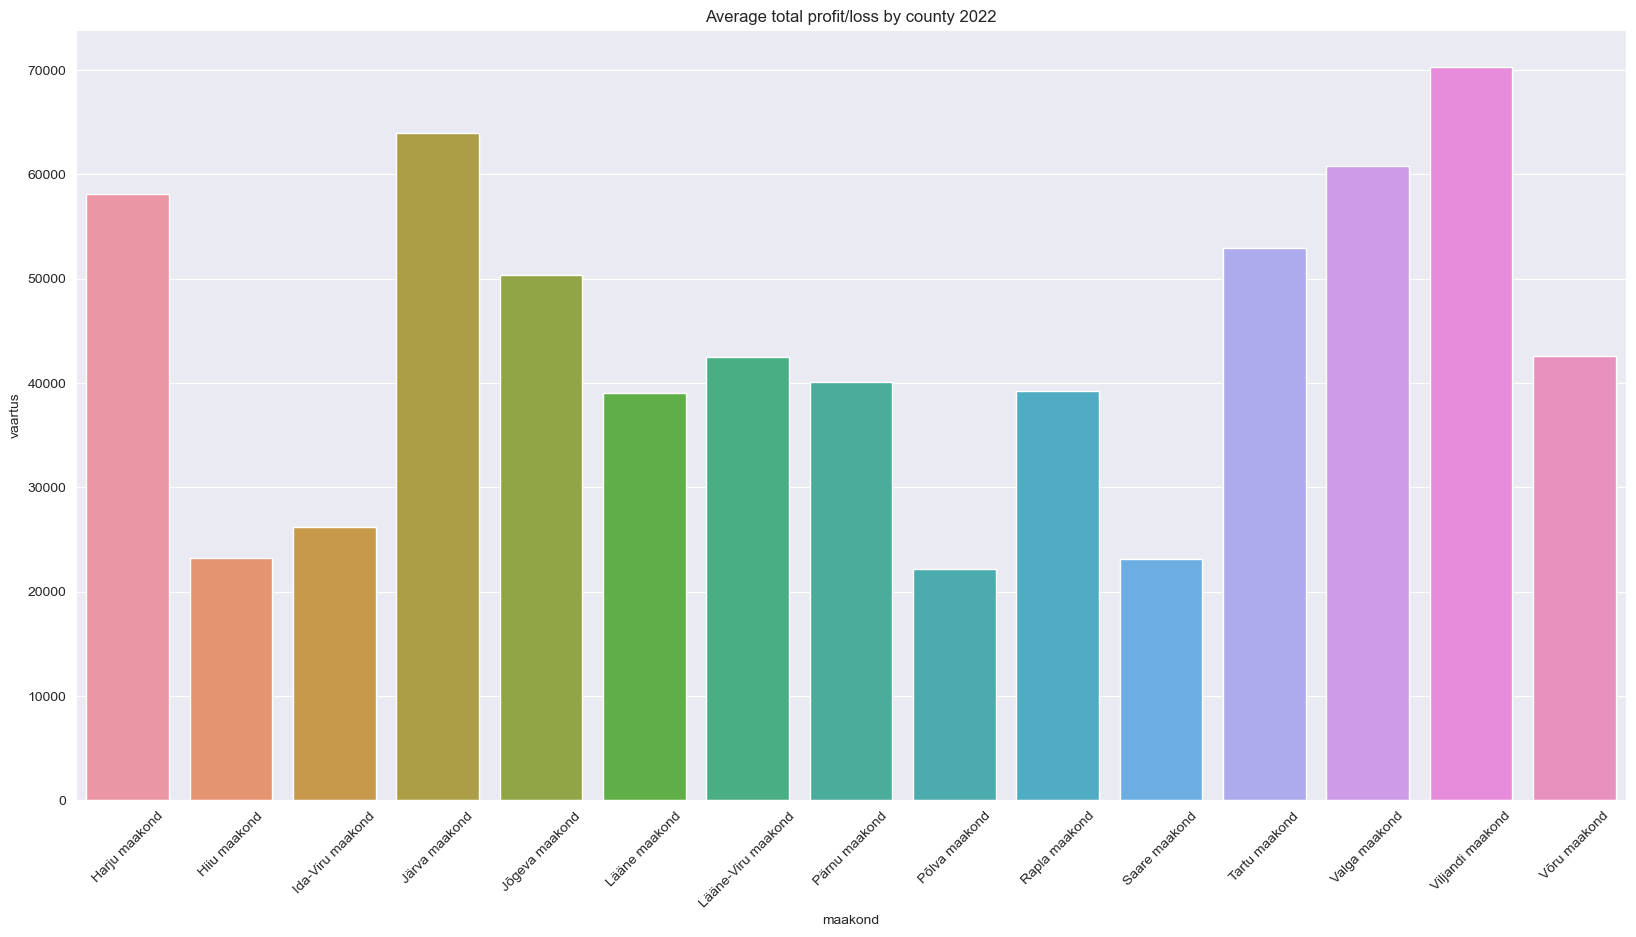

In [34]:
df_total_profit_loss2022 = merged_2022[merged_2022["elemendi_nimetus"] == "TotalProfitLoss"]
df_total_profit_loss2022["vaartus"] = pd.to_numeric(df_total_profit_loss2022["vaartus"])
average_total_profit_loss = df_total_profit_loss2022.groupby("maakond")["vaartus"].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x="maakond", y="vaartus", data=average_total_profit_loss)
plt.title("Average total profit/loss by county 2022")
plt.xticks(rotation=45)
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_16092\79171382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_profit_loss2021["vaartus"] = pd.to_numeric(df_total_profit_loss2021["vaartus"])


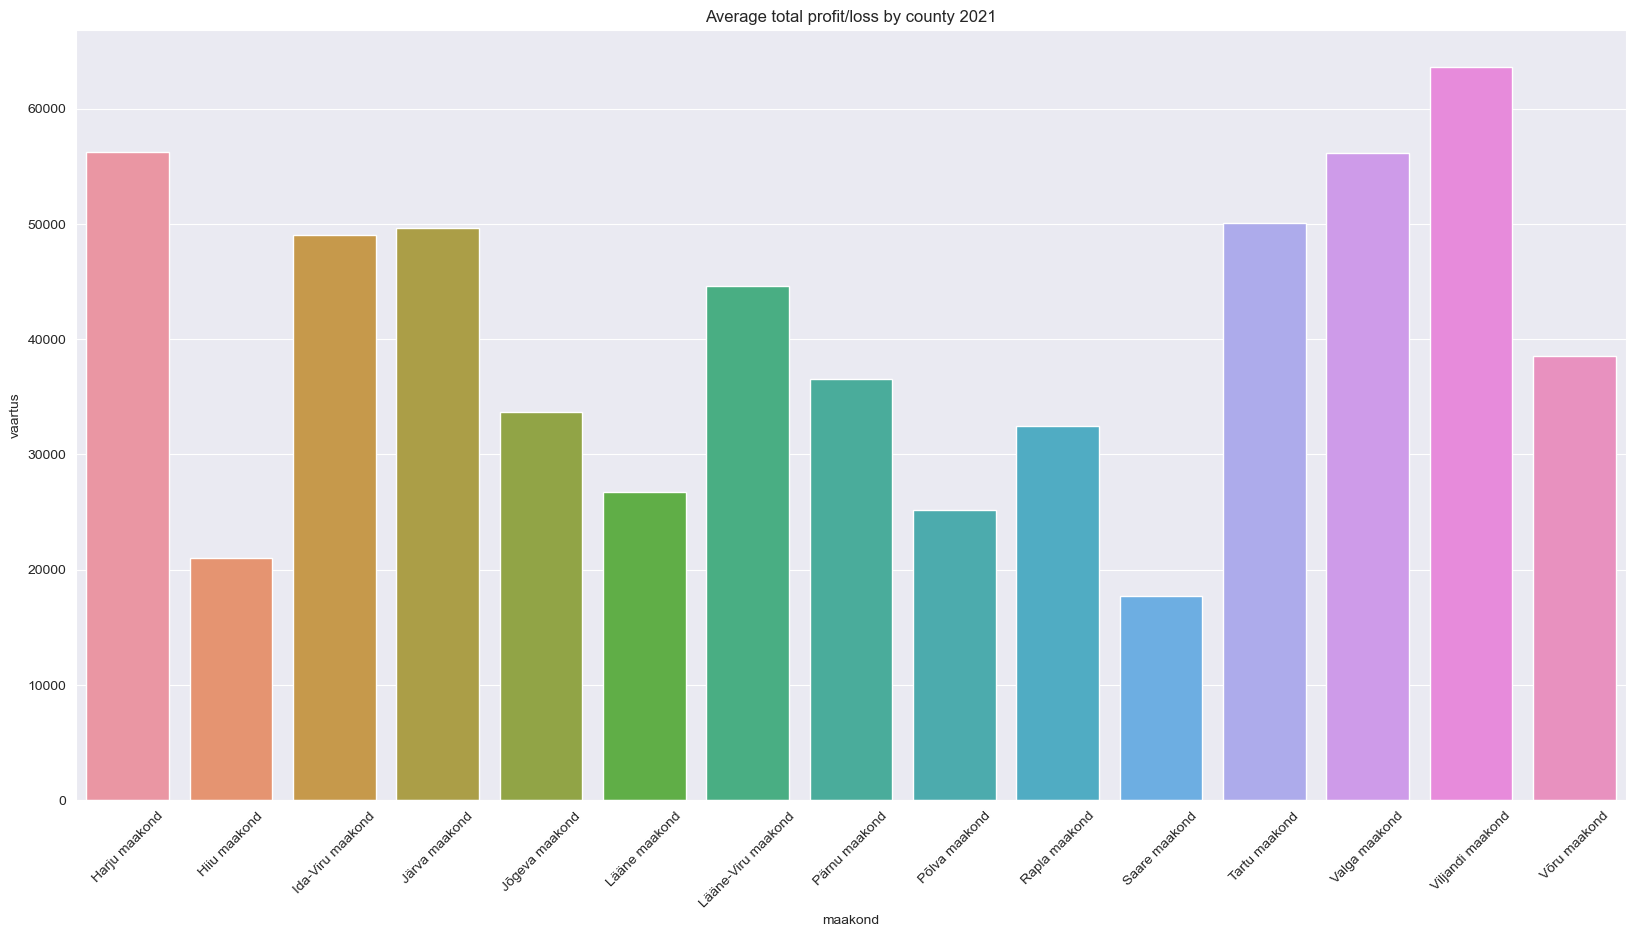

In [35]:
df_total_profit_loss2021 = merged_2021[merged_2021["elemendi_nimetus"] == "TotalProfitLoss"]
df_total_profit_loss2021["vaartus"] = pd.to_numeric(df_total_profit_loss2021["vaartus"])
average_total_profit_loss = df_total_profit_loss2021.groupby("maakond")["vaartus"].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x="maakond", y="vaartus", data=average_total_profit_loss)
plt.title("Average total profit/loss by county 2021")
plt.xticks(rotation=45)
plt.show() 

C:\Users\kevin\AppData\Local\Temp\ipykernel_16092\661892222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_profit_loss2020["vaartus"] = pd.to_numeric(df_total_profit_loss2020["vaartus"])


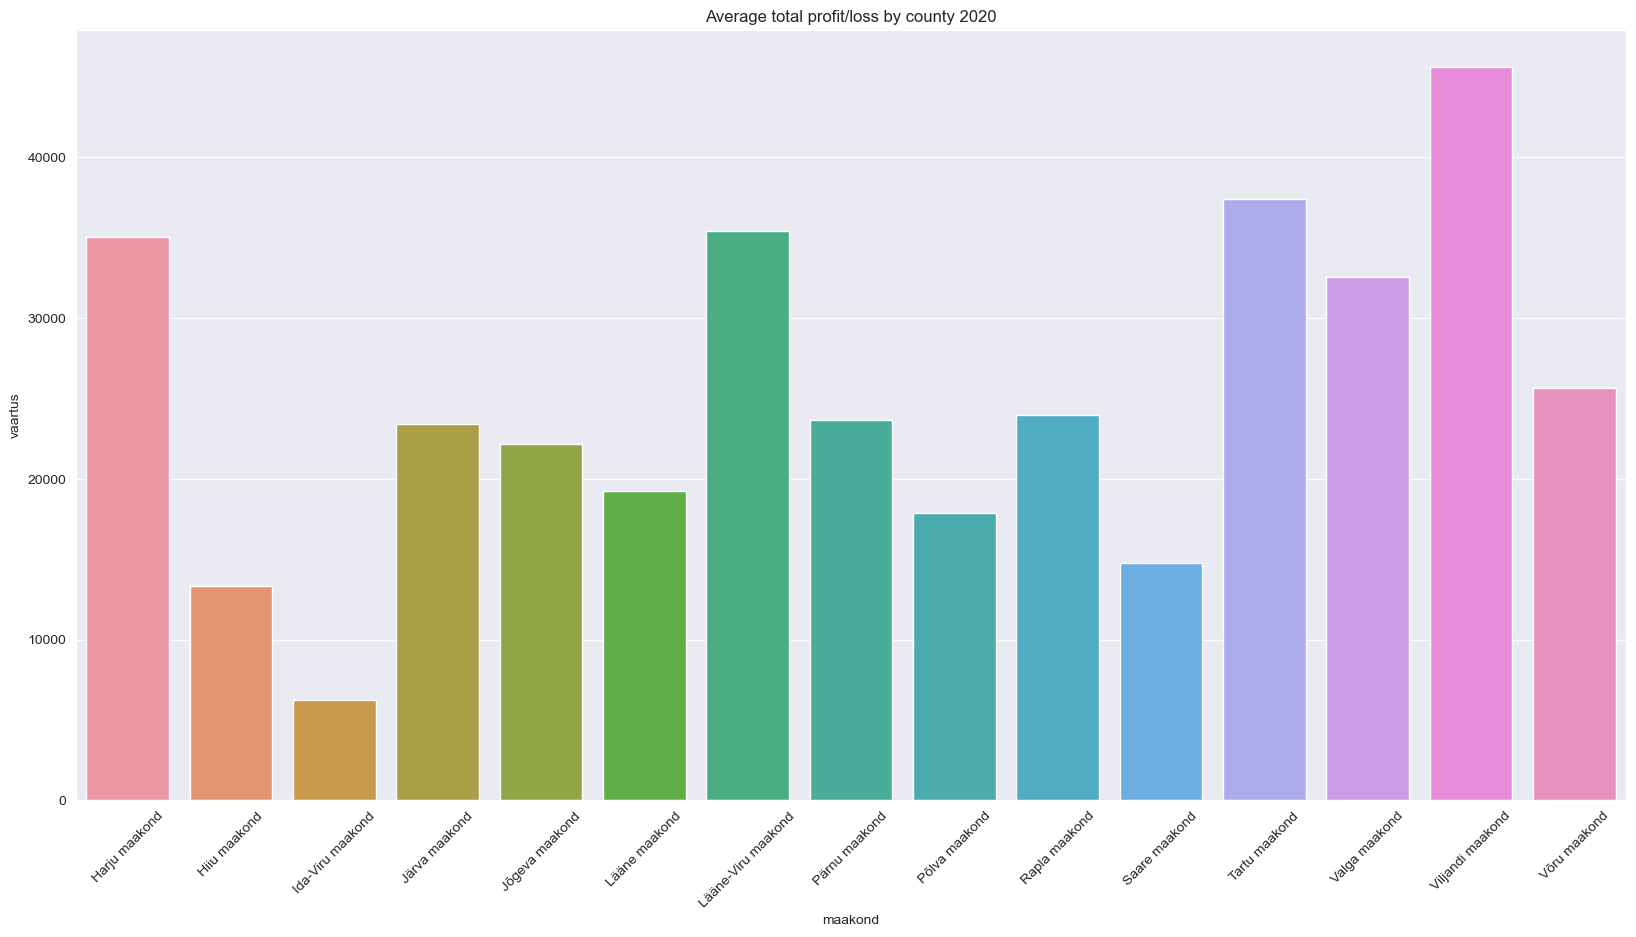

In [36]:
df_total_profit_loss2020 = merged_2020[merged_2020["elemendi_nimetus"] == "TotalProfitLoss"]
df_total_profit_loss2020["vaartus"] = pd.to_numeric(df_total_profit_loss2020["vaartus"])
average_total_profit_loss = df_total_profit_loss2020.groupby("maakond")["vaartus"].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x="maakond", y="vaartus", data=average_total_profit_loss)
plt.title("Average total profit/loss by county 2020")
plt.xticks(rotation=45)
plt.show()

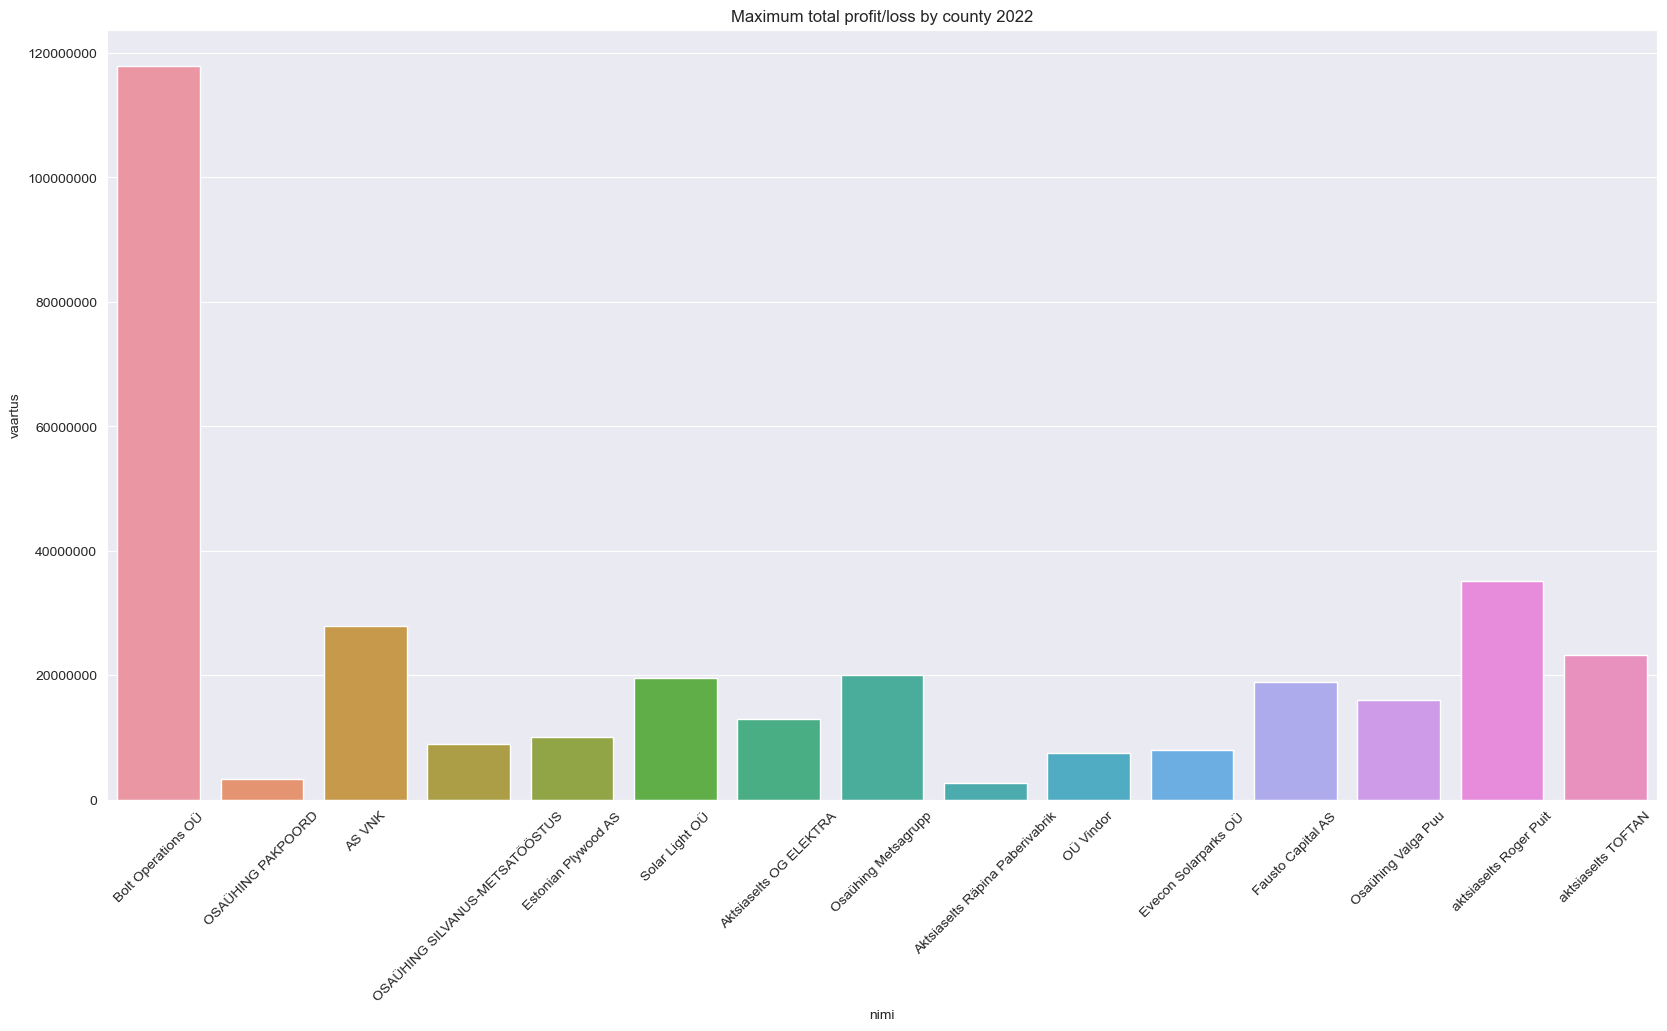

In [37]:
max_indices2022 = df_total_profit_loss2022.groupby("maakond")["vaartus"].idxmax()
plt.figure(figsize=(20, 10))
sns.barplot(x="nimi", y="vaartus", data=df_total_profit_loss2022.loc[max_indices2022])
plt.title("Maximum total profit/loss by county 2022")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()


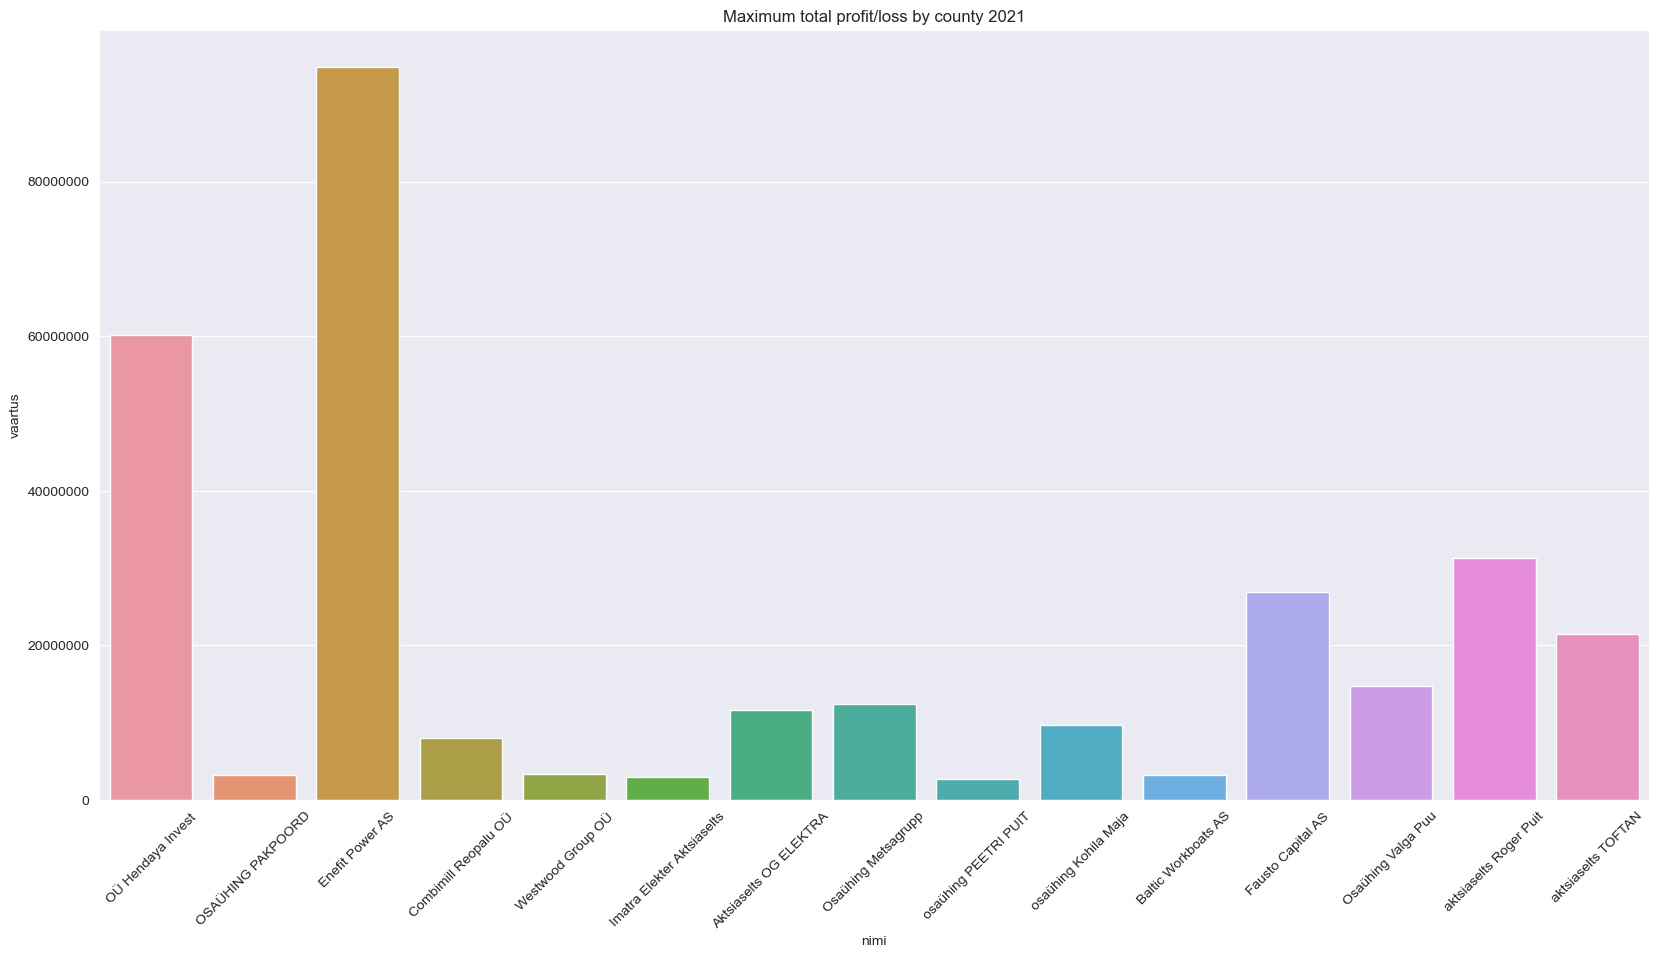

In [38]:
max_indices2021 = df_total_profit_loss2021.groupby("maakond")["vaartus"].idxmax()
plt.figure(figsize=(20, 10))
sns.barplot(x="nimi", y="vaartus", data=df_total_profit_loss2021.loc[max_indices2021])
plt.title("Maximum total profit/loss by county 2021")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

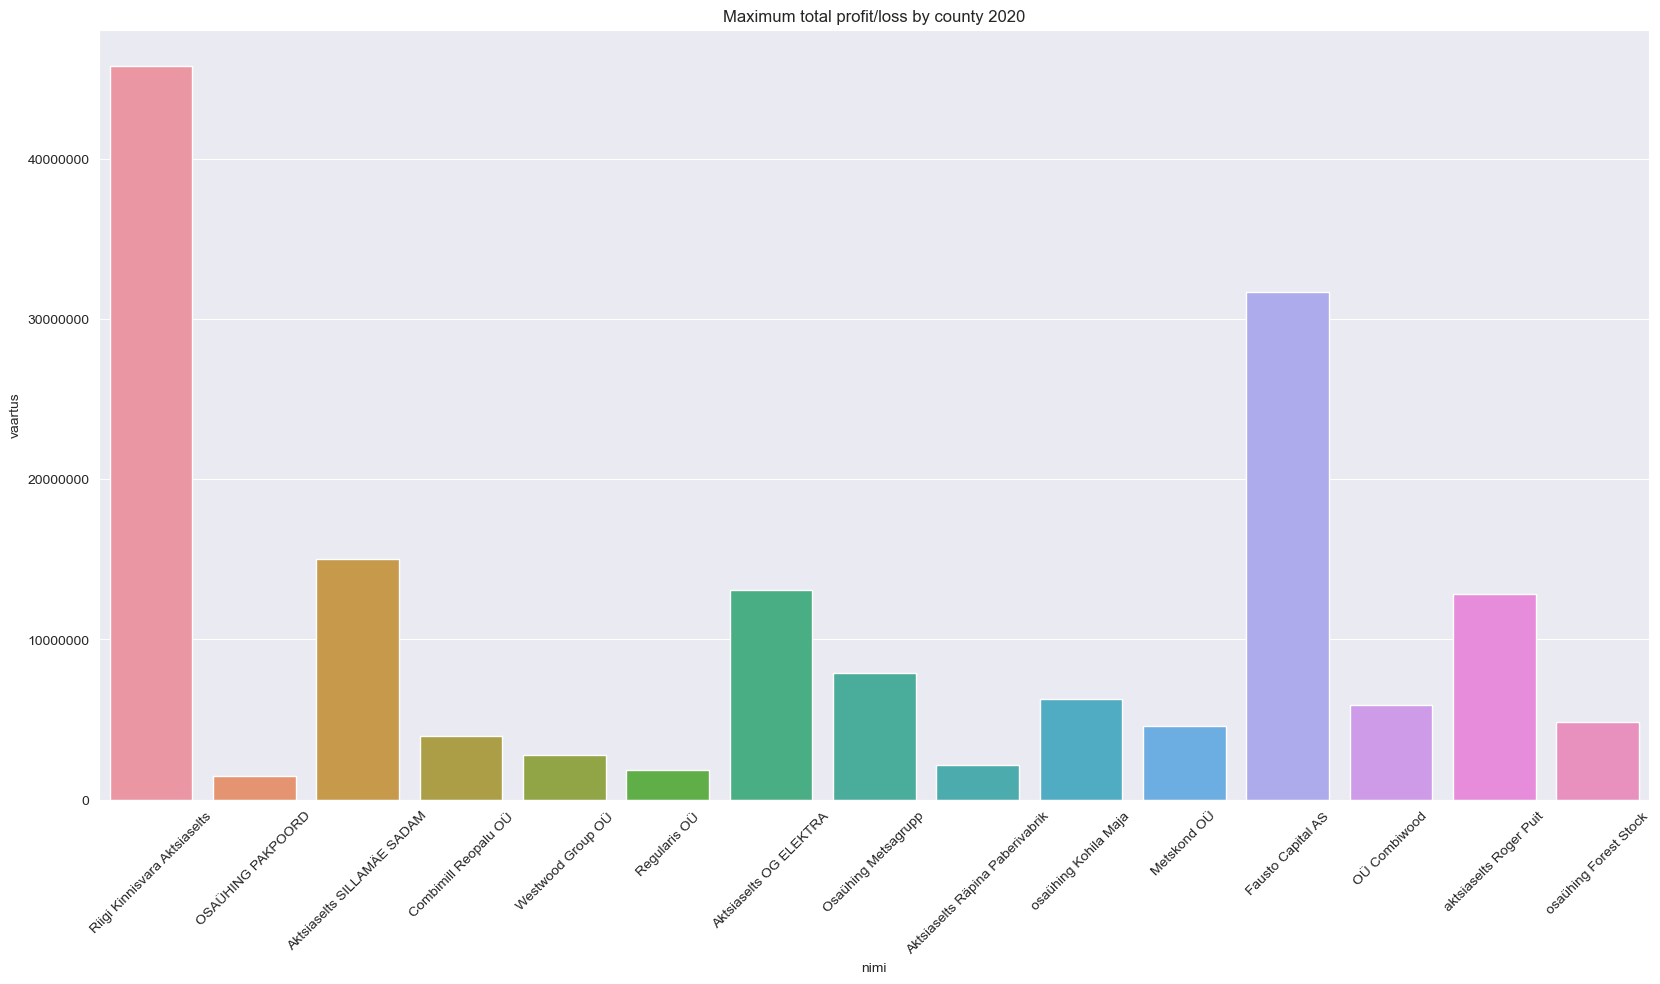

In [39]:
max_indices2020 = df_total_profit_loss2020.groupby("maakond")["vaartus"].idxmax()
plt.figure(figsize=(20, 10))
sns.barplot(x="nimi", y="vaartus", data=df_total_profit_loss2020.loc[max_indices2020])
plt.title("Maximum total profit/loss by county 2020")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()